# Physics 512 - Optics Lab

## Tucker Knaak - Department of Physics, Creighton University - Spring 2022

### Michelson Interferometer Lab

#### The goal of this experiment is to build a Michelson interferometer and use it to make a couple of very precise optical measurements. There are a myriad of important modern applications of interfermetry that are outlined in your text, including but not limited to: precise measurement of optical wavelengths, testing of aberrations in optical elements (Twyman-Green), measurement of rotational speed (Sagnac), measurements of the index of refraction of materials, surface mapping of geological features, and accurately measuring the diameters of stars (Stellar correlation interferometry). This experiment has been divided into three parts. 

#### In part I you will build the Michelson Interferometer so that you can observe interference fringes using a HeNe laser as a light source. By counting fringes that pass by a detector when the optical path difference between the arms of the interferometer is varied, you can verify the wavelength of the HeNe either (Red or Green) laser. This will be the second part of the lab. 

#### In part three you will use your interferometer to make an accurate measurement of the index of refraction of air. As time permits, try to observe fringes from low coherence sources such such as a sodium lamp and/or a white light source. You will find that interference fringes produced by monochromatic sources such as the laser are particularly easy to demonstrate, but to observe fringes with polychromatic incoherent sources will require a precise alignment of the instrument. To this end you will use a diffraction grating to observe "Chamberlain fringes." This technique is described in the journal article by Bell and Tubbs which is attached for your reference.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.odr import ODR, Model, Data, RealData

#### Part 1: Counting Fringes

##### We can measure the wavelength of the laser by counting the number of fringes seen when the mirror distance is changed in the interferometer.  Measured data of four distances and number of fringes are given.

In [2]:
'''Reported data'''
dist_list = [40, 46, 52, 53]        #change in mirror distance [um]
fringe_list = [122, 139, 152, 157]  #number of fringes

'''Reported error'''
dist_err = [1 for _ in range(len(dist_list))]
fringe_err = [0.5 for _ in range(len(fringe_list))]

##### The wavelength as a function of distance and fringes is given by $\lambda = \frac{2\Delta d}{\Delta m}.$

The best-fit wavelength is λ = 671.06 ± 3.11nm.


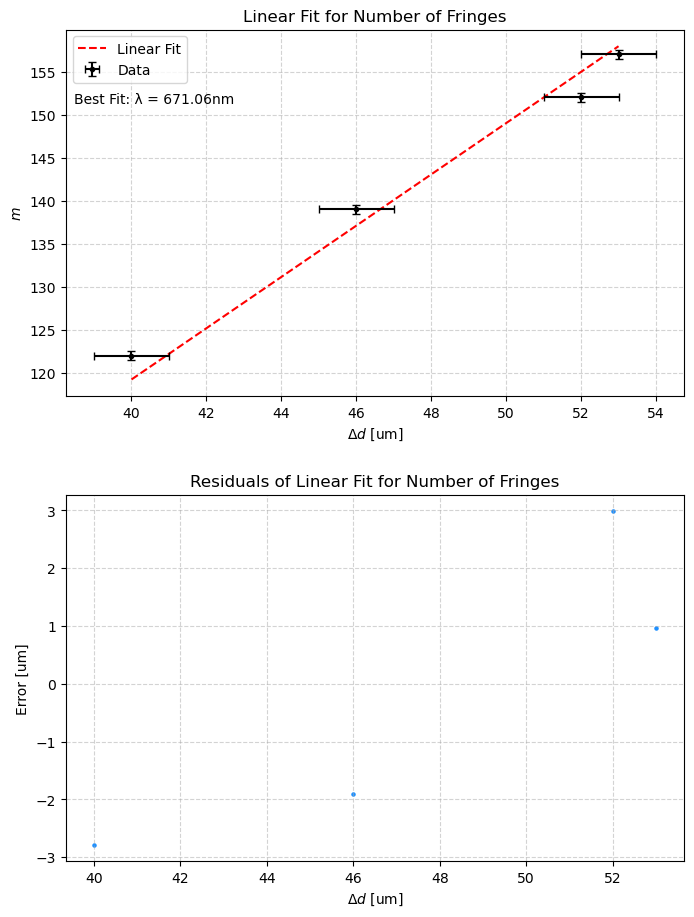

In [3]:
'''Function to calculate the number of fringes'''
def fringes(params: list, d: float):
    m = 2000 * d / params[0]  #wavelength converted to um
    return m

'''Linear scipy.odr curvefit'''
data = RealData(dist_list, fringe_list, dist_err, fringe_err)
model = Model(fringes)
pguess = [632]
odr = ODR(data, model, pguess)
output = odr.run()
wavelength, wavelength_err = output.beta[0], output.sd_beta[0] / np.sqrt(len(dist_list))
residuals = [fringes([wavelength], d) - m for d, m in zip(dist_list, fringe_list)]
print(f'The best-fit wavelength is \u03BB = {wavelength:.2f} \u00B1 {wavelength_err:.2f}nm.')

'''Plot results'''
dist_points = np.linspace(min(dist_list), max(dist_list), 100, endpoint = True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
fig.tight_layout(pad = 5.0)

'''First figure --> Non-linear fit'''
ax1.set_xlabel('$\Delta d$ [um]')
ax1.set_ylabel('$m$')
ax1.set_title('Linear Fit for Number of Fringes')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax1.plot(dist_points, fringes([wavelength], dist_points), linestyle = 'dashed', color = 'red', label = 'Linear Fit')
ax1.errorbar(dist_list, fringe_list, fringe_err, dist_err, capsize = 3, fmt = 'k.', label = 'Data')
ax1.legend(loc = 'upper left')
ax1.annotate(f'Best Fit: \u03BB = {wavelength:.2f}nm', xy = (0.142, 0.81), xycoords = 'axes fraction',
             ha = 'center', va = 'center', fontsize = 10)

'''Second figure --> Residuals'''
ax2.set_xlabel('$\Delta d$ [um]')
ax2.set_ylabel('Error [um]')
ax2.set_title('Residuals of Linear Fit for Number of Fringes')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax2.scatter(dist_list, residuals, color = 'dodgerblue', s = 5)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/Wavelength_LinearFit.png')

#### Part 3: Index of Refraction of Air.

##### We can measure the index of refraction of air by counting the number of fringes when the pressure in the gas cell is changed in the interferometer.  Measured data of five pressures and number of fringes are given.

In [4]:
'''Reported data'''
pressure_list = [15.03, 17.53, 20.03, 22.53, 25.03]  #pressure in gas cell [in / Hg]
fringe_list = [16, 14, 11, 8, 5]                     #change in number of fringes

'''Reported error'''
pressure_err = [0.5 for _ in range(len(pressure_list))]
fringe_err = [0.5 for _ in range(len(fringe_list))]

'''Given constants'''
wavelength = 632.8  #wavelength of HeNe laser [nm]
P0 = 30.03          #atmospheric pressure on 03/01/22 in Omaha, NE [in / Hg]
L = 4.52            #length of gas cell [cm]

##### The index of refraction as a function of number of fringes and pressure is given by $n=\frac{(\Delta m\lambda/2L)-(P_{cell}/P_0)+1}{1-(P_{cell}/P_0)}.$

The best-fit index of refraction of air is n = 1.000228 ± 0.000001.


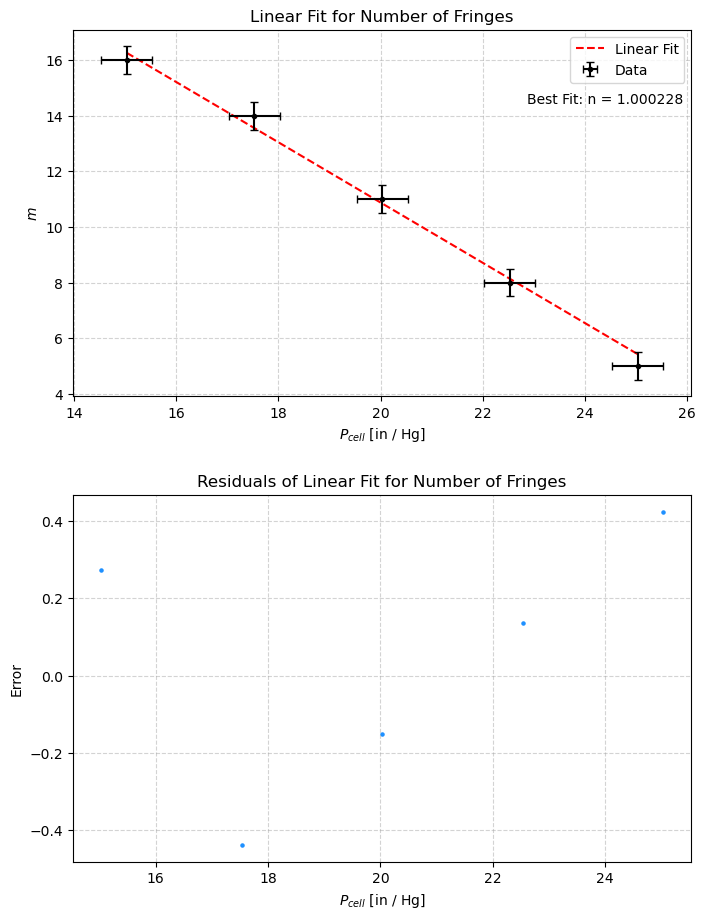

In [5]:
'''Function to calculate the number of fringes'''
def fringes(params: list, P: float):
    n = params[0]  #index of refraction of air
    m = (2 * L * 10**7) * (n - (1 + (n - 1) * (P / P0))) / wavelength
    return m

'''Linear scipy.odr curvefit'''
data = RealData(pressure_list, fringe_list, pressure_err, fringe_err)
model = Model(fringes)
pguess = [1.000223]
odr = ODR(data, model, pguess)
output = odr.run()
n, n_err = output.beta[0], output.sd_beta[0] / np.sqrt(len(pressure_list))
residuals = [fringes([n], P) - m for P, m in zip(pressure_list, fringe_list)]
print(f'The best-fit index of refraction of air is n = {n:.6f} \u00B1 {n_err:.6f}.')

'''Plot results'''
pressure_points = np.linspace(min(pressure_list), max(pressure_list), 100, endpoint = True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
fig.tight_layout(pad = 5.0)

'''First figure --> Non-linear fit'''
ax1.set_xlabel('$P_{cell}$ [in / Hg]')
ax1.set_ylabel('$m$')
ax1.set_title('Linear Fit for Number of Fringes')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax1.plot(pressure_points, fringes([n], pressure_points), linestyle = 'dashed', color = 'red', label = 'Linear Fit')
ax1.errorbar(pressure_list, fringe_list, fringe_err, pressure_err, capsize = 3, fmt = 'k.', label = 'Data')
ax1.legend(loc = 'upper right')
ax1.annotate(f'Best Fit: n = {n:.6f}', xy = (0.86, 0.81), xycoords = 'axes fraction',
             ha = 'center', va = 'center', fontsize = 10)

'''Second figure --> Residuals'''
ax2.set_xlabel('$P_{cell}$ [in / Hg]')
ax2.set_ylabel('Error')
ax2.set_title('Residuals of Linear Fit for Number of Fringes')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax2.scatter(pressure_list, residuals, color = 'dodgerblue', s = 5)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/IndexRefractionAir_LinearFit.png')